# Task 2


1.	Clean the data – you might have to address missing values, duplicates, data type conversions, transformations, and multicollinearity, as well as outliers.
2.	Perform some exploratory data analysis. Look into the data types, data statistics, and identify any missing data or null values, and how often they appear in the data. Visualize specific parameters as well as variable distributions.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import os

## 1. Data loading

In [69]:
data = pd.read_csv('./ml_case_training_data.csv')
hist_data = pd.read_csv('./ml_case_training_hist_data.csv')
output_data = pd.read_csv('./ml_case_training_output.csv')


In [70]:
print(data.shape)
data.head()

(16096, 32)


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [71]:
# merge the main dataset with churn data
df=data.merge(output_data,
             how = 'inner',
             on = ['id'])

In [72]:
print(df.shape)
df.head()

(16096, 33)


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


combine table 1 and 3, we have 33 columns with 16096 data 

## 2. Data overview

In [103]:
pd.DataFrame({"Data type":df.dtypes})

,Data type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


It shows that the dates are not datetime type.

In [104]:
pd.DataFrame({"Data type":hist_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


In [105]:
df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


The summary shows that:

1. There are negative values in consumption and forecasts variables.
Note(from sample answer): This could mean that the client companies are producing energy and therefore energy should be "returned", although it is unlikely and we will consider itas corrupted data.

2. campaign_disc_ele has no value.

3. Data are skewed.

In [106]:
hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


The summary for historical data shows some negative value for price, which is not reasonable.

### Missing data

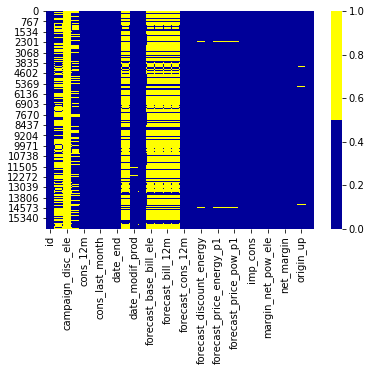

In [73]:
cols = data.columns   # missing data visualisation
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [107]:
pd.DataFrame({"Missing values (%)": df.isnull().sum()/len(df.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [108]:
pd.DataFrame({"Missing values (%)": hist_data.isnull().sum()/len(hist_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


## 3. Data cleaning

### Missing value

In [120]:

# drop variables with NAN more than 50% and variables with weird information
cols_to_drop = ['campaign_disc_ele', 'date_first_activ',
                'forecast_base_bill_ele', 'forecast_base_bill_year', 
                'forecast_bill_12m', 'forecast_cons']
data_1=df.drop(cols_to_drop, axis=1)


### Check duplicates

In [122]:
data_1[data_1.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


### Formatting data

### Missing dates

Ways to handle missing dates

1. Engineer the dates from known values. For example, the date_renewal is usually the same date as the date_modif_prodbut one year ahead.

2. Replace missing values with the meadian (most frequent date).

For numerical values, the built-in function .median() can be used, but this will not work for dates or strings, so we will use a workaround using .valuecounts()

In [124]:
df.loc[df["date_modif_prod"].isnull(),"date_modif_prod"] =df["date_modif_prod"].value_counts().index[0]
df.loc[df["date_end"].isnull(),"date_end"] =df["date_end"].value_counts().index[0]
df.loc[df["date_renewal"].isnull(),"date_renewal"] =df["date_renewal"].value_counts().index[0]

### Missing data

There are missing data in the historical price dataset for some companies and months.

In [125]:
missing_data_percentage=hist_data.isnull().sum()/len(hist_data.index)*100

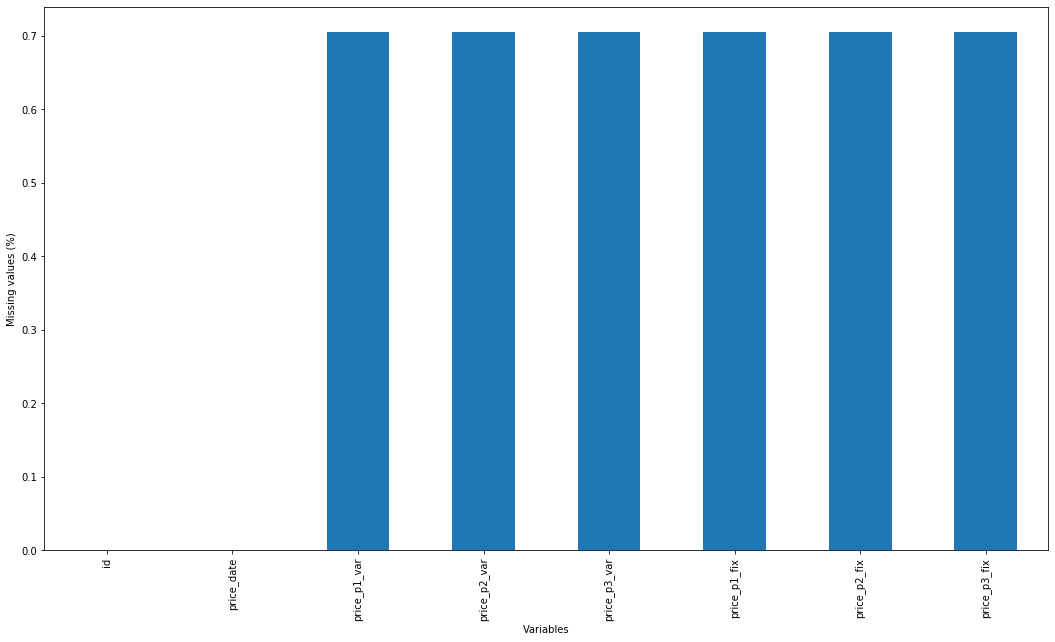

In [126]:
missing_data_percentage.plot(kind="bar", figsize=(18,10))# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

Impute with median.

Note: We could use something slightly more complicated such as using the mean of the previous and following months to calculate the value of themissing month since the data does not vary much.

In [129]:
hist_data[hist_data.isnull().any(axis=1)]

hist_data.loc[hist_data["price_p1_var"].isnull(),"price_p1_var"] =hist_data["price_p1_var"].median()
hist_data.loc[hist_data["price_p2_var"].isnull(),"price_p2_var"] =hist_data["price_p2_var"].median()
hist_data.loc[hist_data["price_p3_var"].isnull(),"price_p3_var"] =hist_data["price_p3_var"].median()
hist_data.loc[hist_data["price_p1_fix"].isnull(),"price_p1_fix"] =hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"].isnull(),"price_p2_fix"] =hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"].isnull(),"price_p3_fix"] =hist_data["price_p3_fix"].median()

### formatting dates

In [130]:
# Transform date columns to datetime type
df["date_activ"] =pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] =pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] =pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] =pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [131]:
hist_data["price_date"] =pd.to_datetime(hist_data["price_date"], format='%Y-%m-%d')

### Negative data

For the history data there are negative values for price_p1_fix, price_p2_fix and price_p3_fix.

Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather thana "price discount".

We will replace the negative values with the median (most frequent value

In [133]:
hist_data[(hist_data.price_p1_fix<0) | (hist_data.price_p2_fix<0) | (hist_data.price_p3_fix<0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [134]:
hist_data.loc[hist_data["price_p1_fix"] <0,"price_p1_fix"] =hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"] <0,"price_p2_fix"] =hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"] <0,"price_p3_fix"] =hist_data["price_p3_fix"].median()

## 4. Data visualisation

For variables included in the dataset.

### Churn

The target variable: churn rate.

In [135]:
churn = df[["id", "churn"]]
churn.columns = ["Companies", "churn"]

In [136]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """    
    Plot stacked bars with annotations
    """
    ax=dataframe.plot(kind="bar",
                      stacked=True,
                      figsize=size_,
                      rot=rot_,
                      title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
    
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """    
    Add value annotations to the bars    
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value=str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value =='0.0':
            continue
        ax.annotate(value,
                    ((p.get_x()+p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,
                   )

In [137]:
churn_total=churn.groupby(churn["churn"]).count()
churn_percentage=churn_total/churn_total.sum()*100

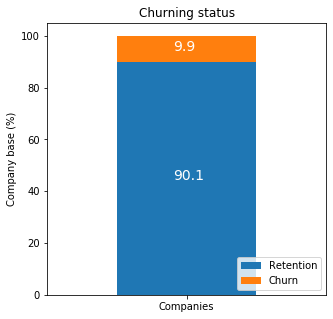

In [138]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

Around 10% of totla customers have churned.

### SME activity

In [139]:
activity=df[["id","activity_new", "churn"]]
# category of the company's activity

In [140]:
activity=activity.groupby([activity["activity_new"],
                           activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

In [141]:
activity

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
cwofmuicebbcmiaaxufmfimpowpacobu,110.0,12.0
cluecxlameloamldmasudocsbmaoamdw,105.0,14.0
wxemiwkumpibllwklfbcooafckufkdlm,102.0,17.0
sfisfxfcocfpcmckuekokxuseixdaoeu,78.0,5.0


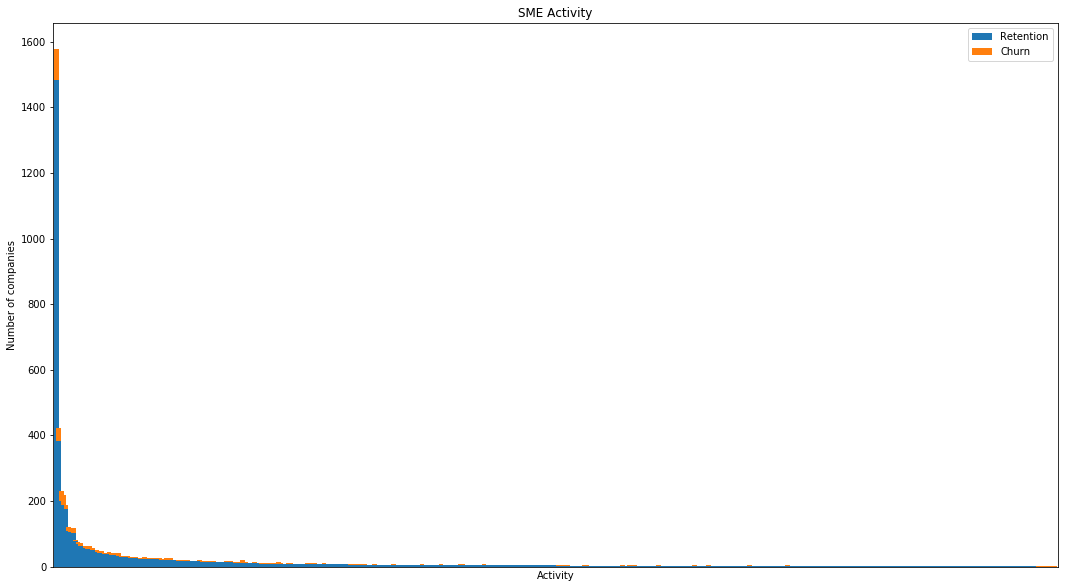

In [142]:
activity.plot(kind="bar",
              figsize=(18, 10),
              width=2,
              stacked=True,
              title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

 churn is not specifically related to any SME cateogry in particular

To look at the values percentage-wise. If sorted by activity some companies have churned a 100% but this is due to the fact that only a few companies belong to that activity.

In [143]:
activity_total=activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage=activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percentage churn": activity_percentage
              ,"Total companies": activity_total }).sort_values(by="Percentage churn",
                                                                ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


Our predictive model is likely to struggle accurately predicting the the SME activity due to the large number of categories and low number of companies belonging to each category.

### Sales channel
Note: can be telephone, email... hashed text strings here.

In [144]:
channel=df[["id","channel_sales", "churn"]]

In [145]:
channel=channel.groupby([channel["channel_sales"],
                         channel["churn"]])["id"].count().unstack(level=1).fillna(0)

In [146]:
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [147]:
channel_churn= (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

We will plot the categories, despite the fact that data is available for only 75% of the dataset.

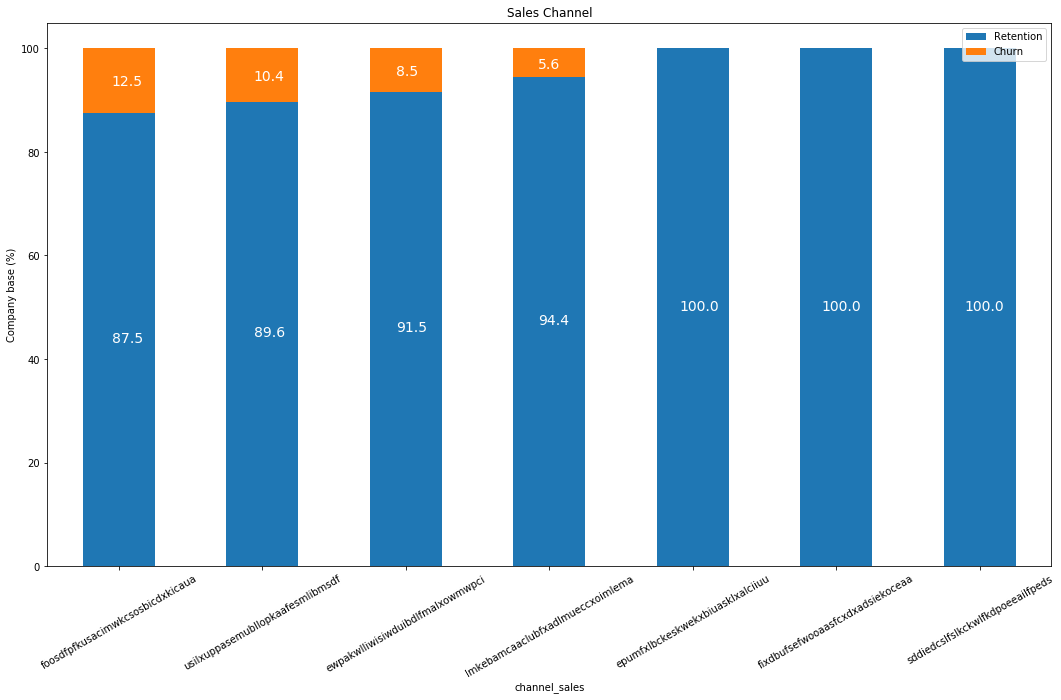

In [148]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

To see percentage-wise

In [149]:
channel_total=channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage=channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,"Total companies": channel_total }).sort_values(by="Churn percentage",
                                                                                                     ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


### Consumption

In [150]:
consumption=df[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

The most straight forward to visualise and identify the distribution of uni-variate data is through histograms

In [151]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """    
    Plot variable distirbution in a stacked histogram of churned or retained company    
    """
    # Create a temporal dataframe with the data to be plot
    temp=pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                       "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

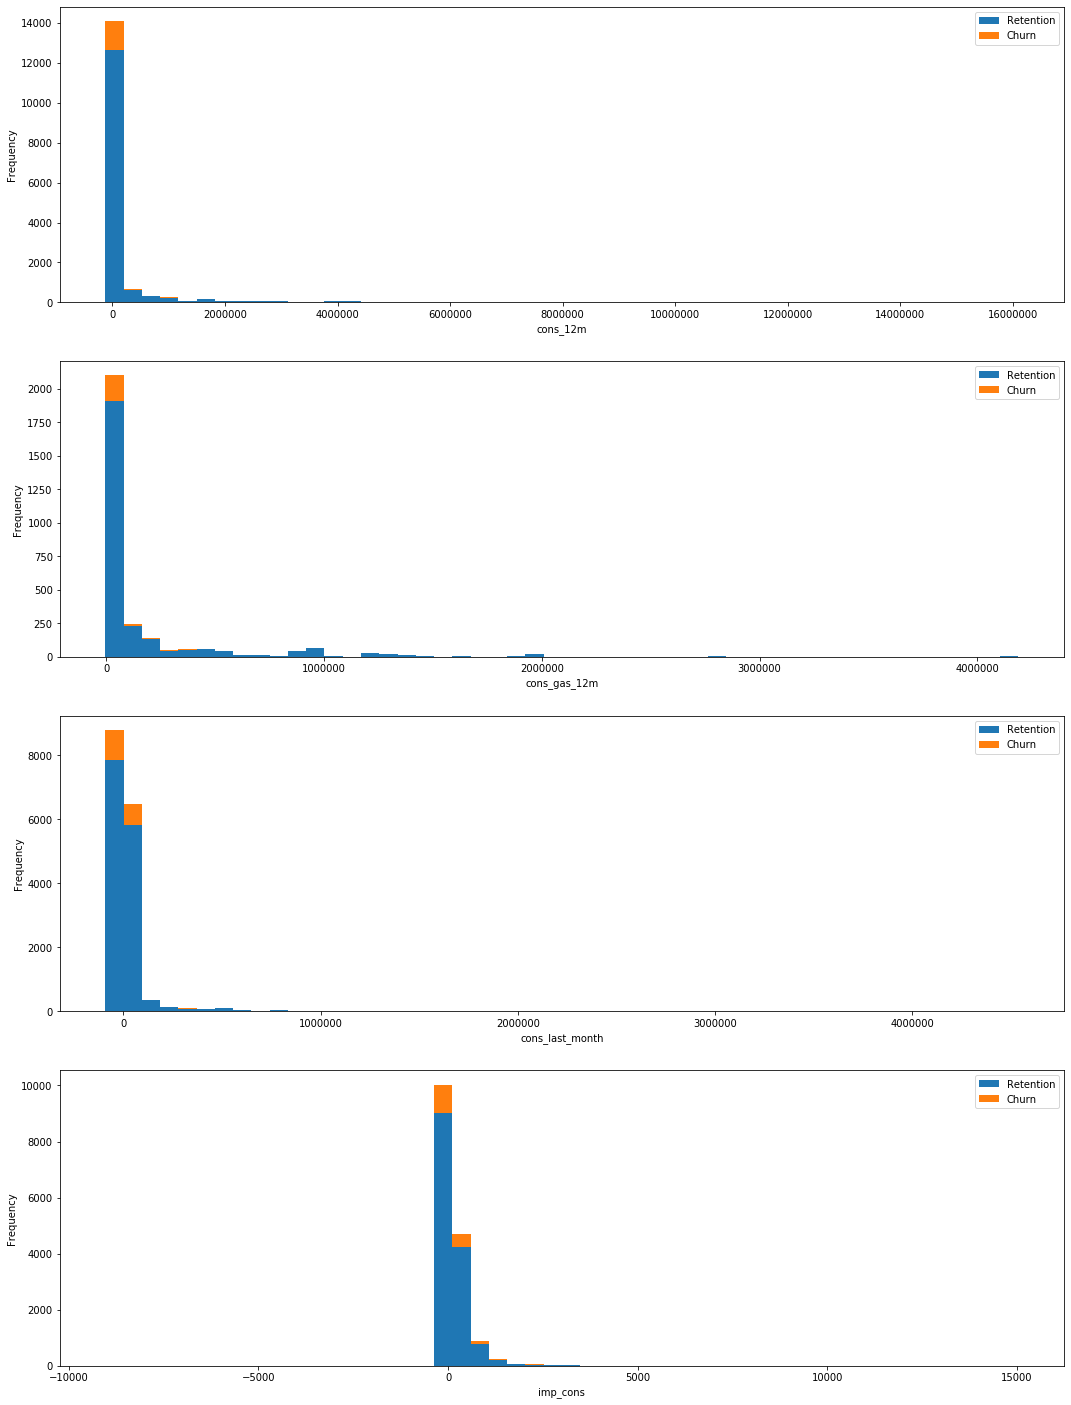

In [152]:
fig, axs=plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] =="t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

We can clearly see in here that the consumption data is highly skewedtotheright, presenting a very long right-tail towards the higher values of thedistribution.


Note:The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in moredetail. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median,third quartile (Q3), and “maximum”). It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightlyour data is grouped, and if and how our data is skewed.

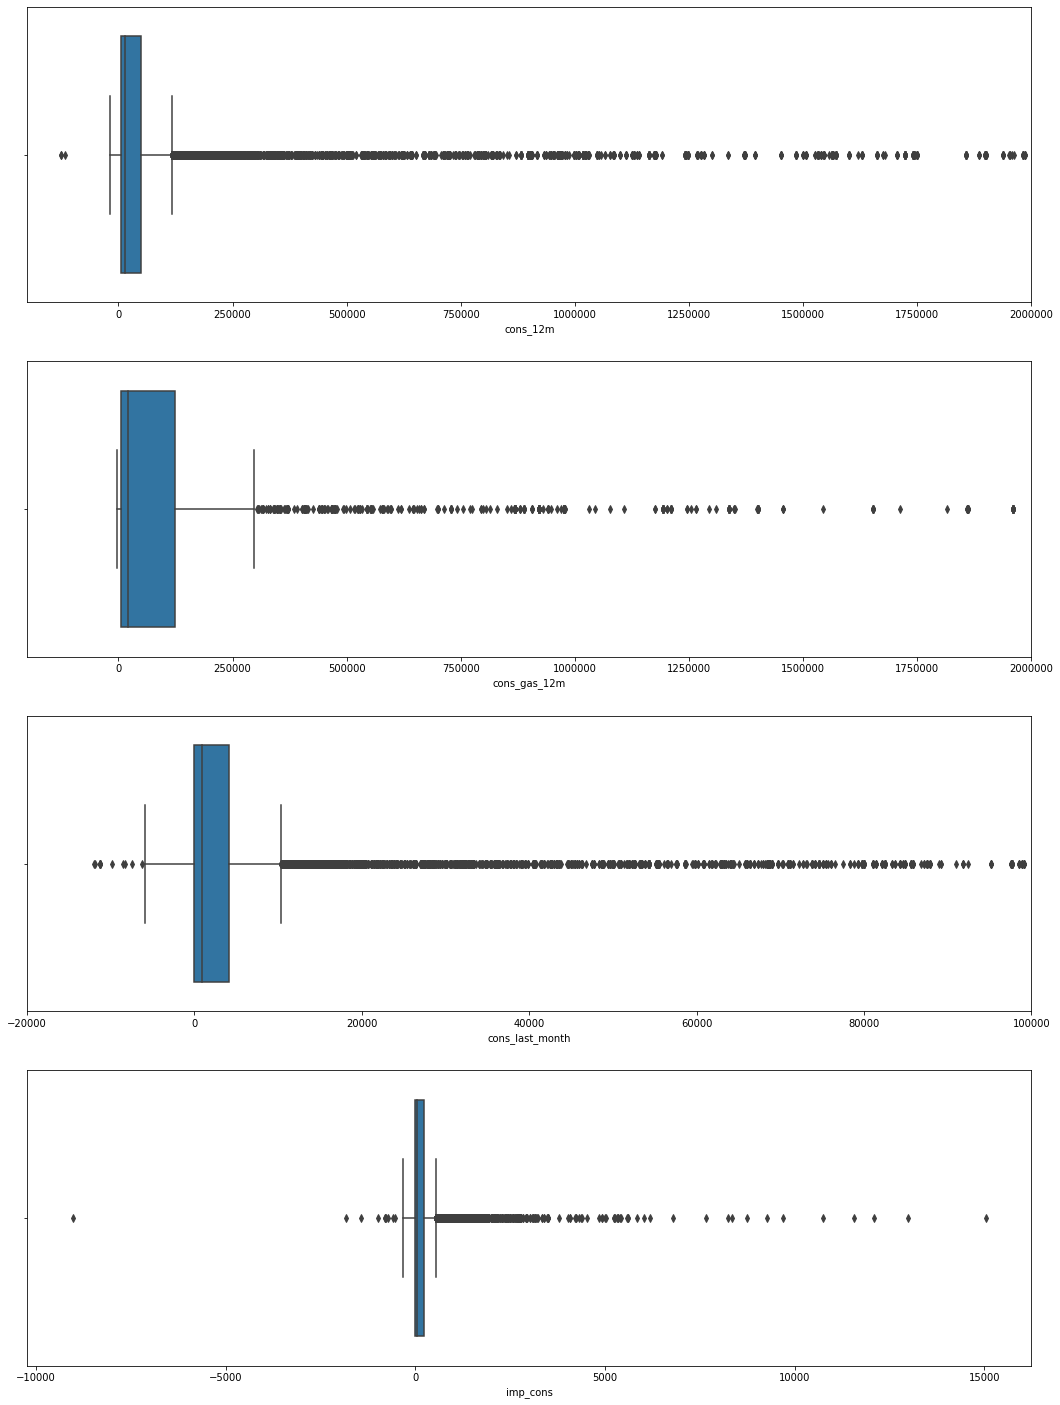

In [153]:
fig, axs=plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] =="t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

It shows that we have a highly skwerd distribution, with some outliers.

### Dates

In [154]:
dates=df[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [155]:
# Transform date columns to datetime type
dates["date_activ"] =pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] =pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] =pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] =pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

In [157]:
def plot_dates(dataframe, column, fontsize_=12):
    """    
    Plot monthly churn and retention distribution    
    """
    # Group by month
    temp=dataframe[[column,
                    "churn",
                    "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()
    
    
def line_format(label):
    """    
    Convert time label to the format of pandas line plot    
    """
    month=label.month_name()[:1]
    if label.month_name() =="January":
        month+=f'\n{label.year}'
    return month    
    
    

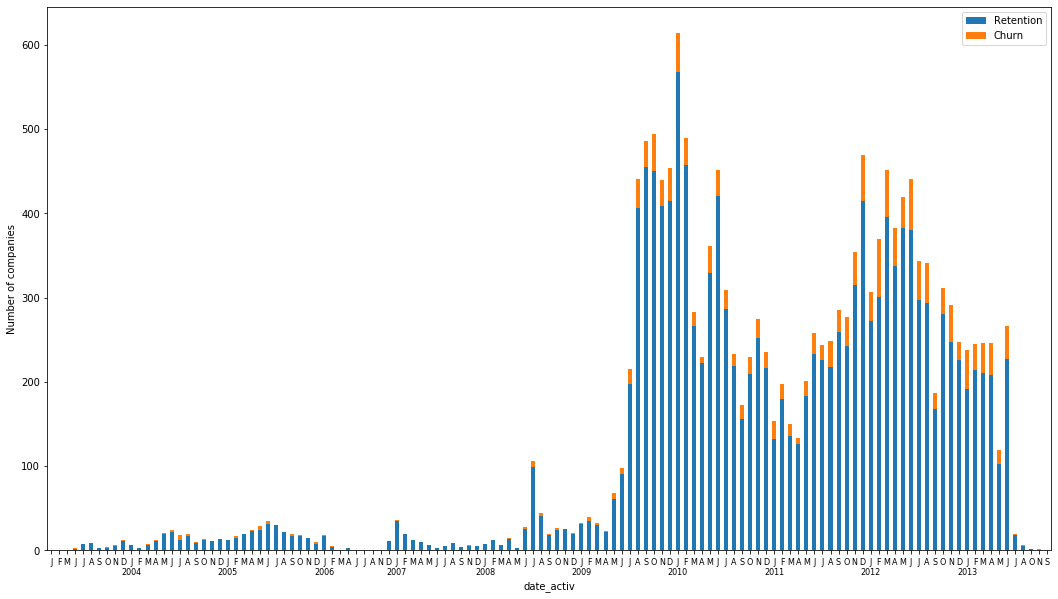

In [158]:
plot_dates(dates, "date_activ", fontsize_=8)

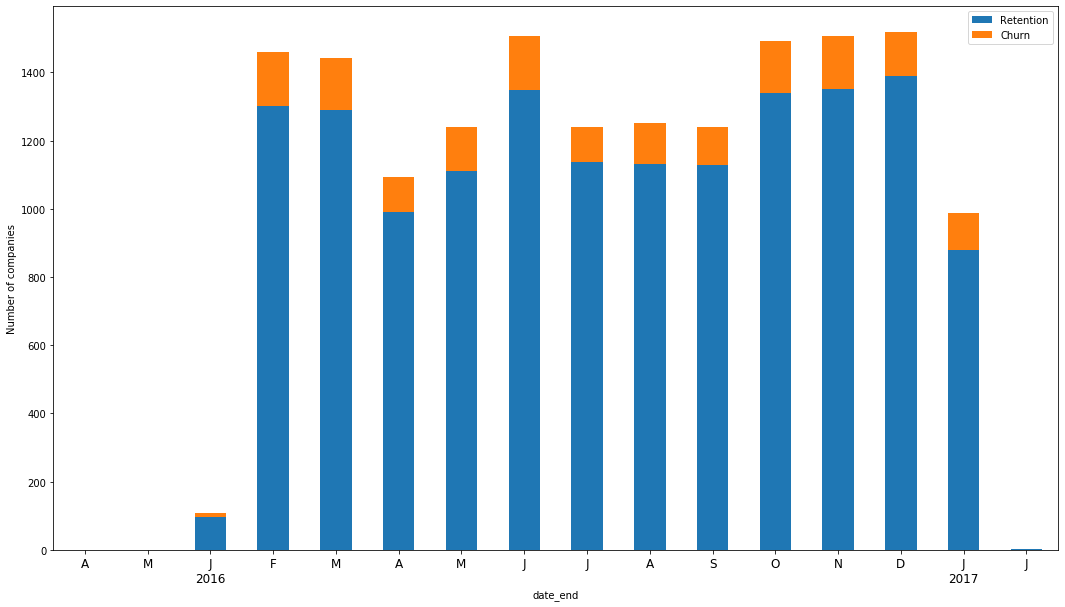

In [159]:
plot_dates(dates, "date_end")

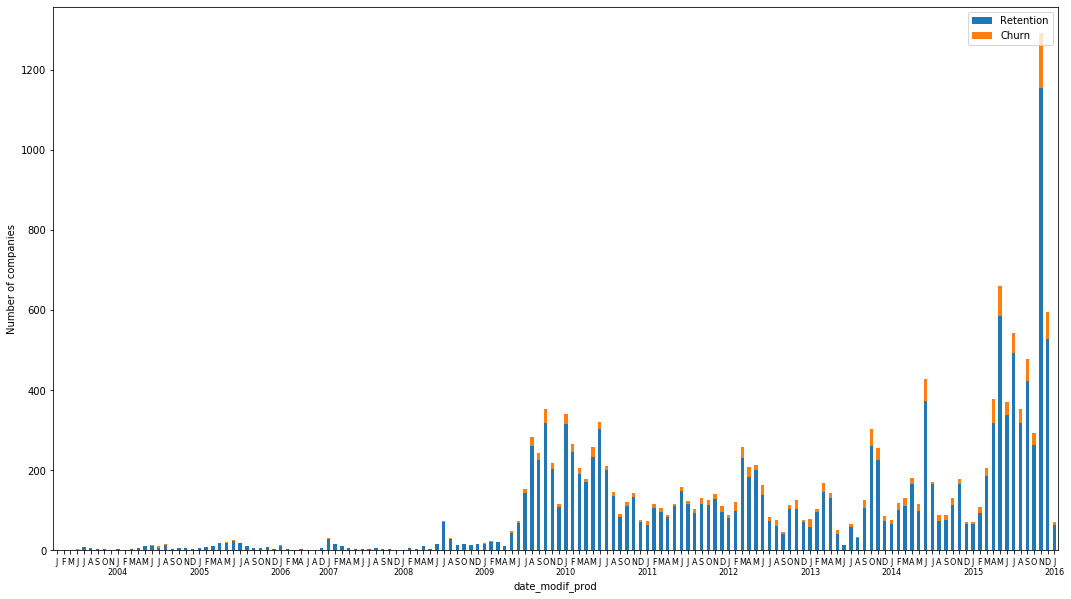

In [160]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

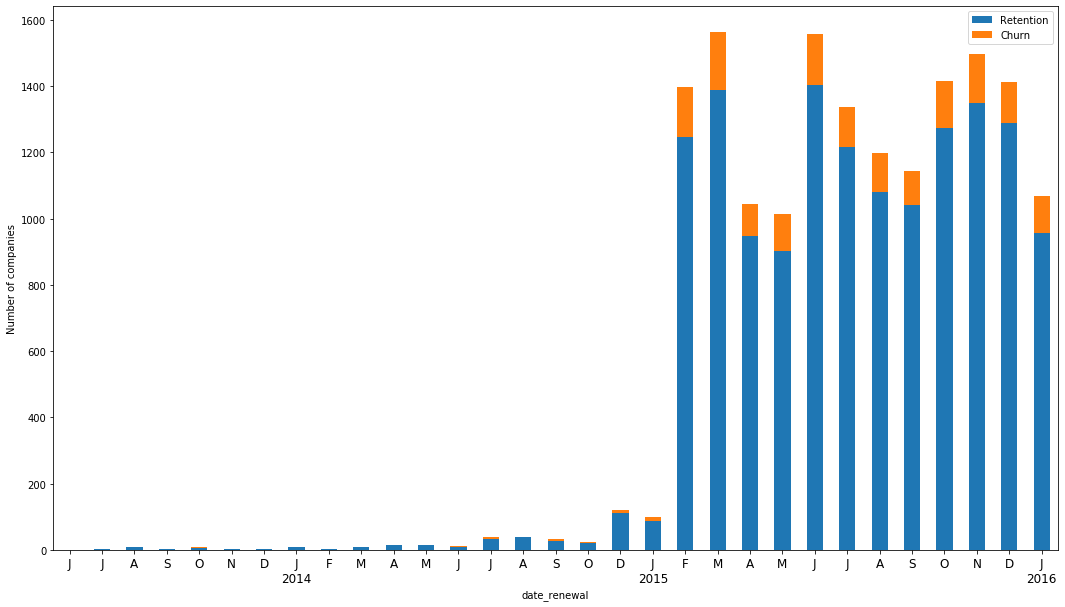

In [162]:
plot_dates(dates, "date_renewal")

### Forecast

In [163]:
forecast=df[["id","forecast_base_bill_ele","forecast_base_bill_year",
                "forecast_bill_12m","forecast_cons","forecast_cons_12m",
                "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
                "forecast_price_energy_p1","forecast_price_energy_p2",
                "forecast_price_pow_p1","churn"]]

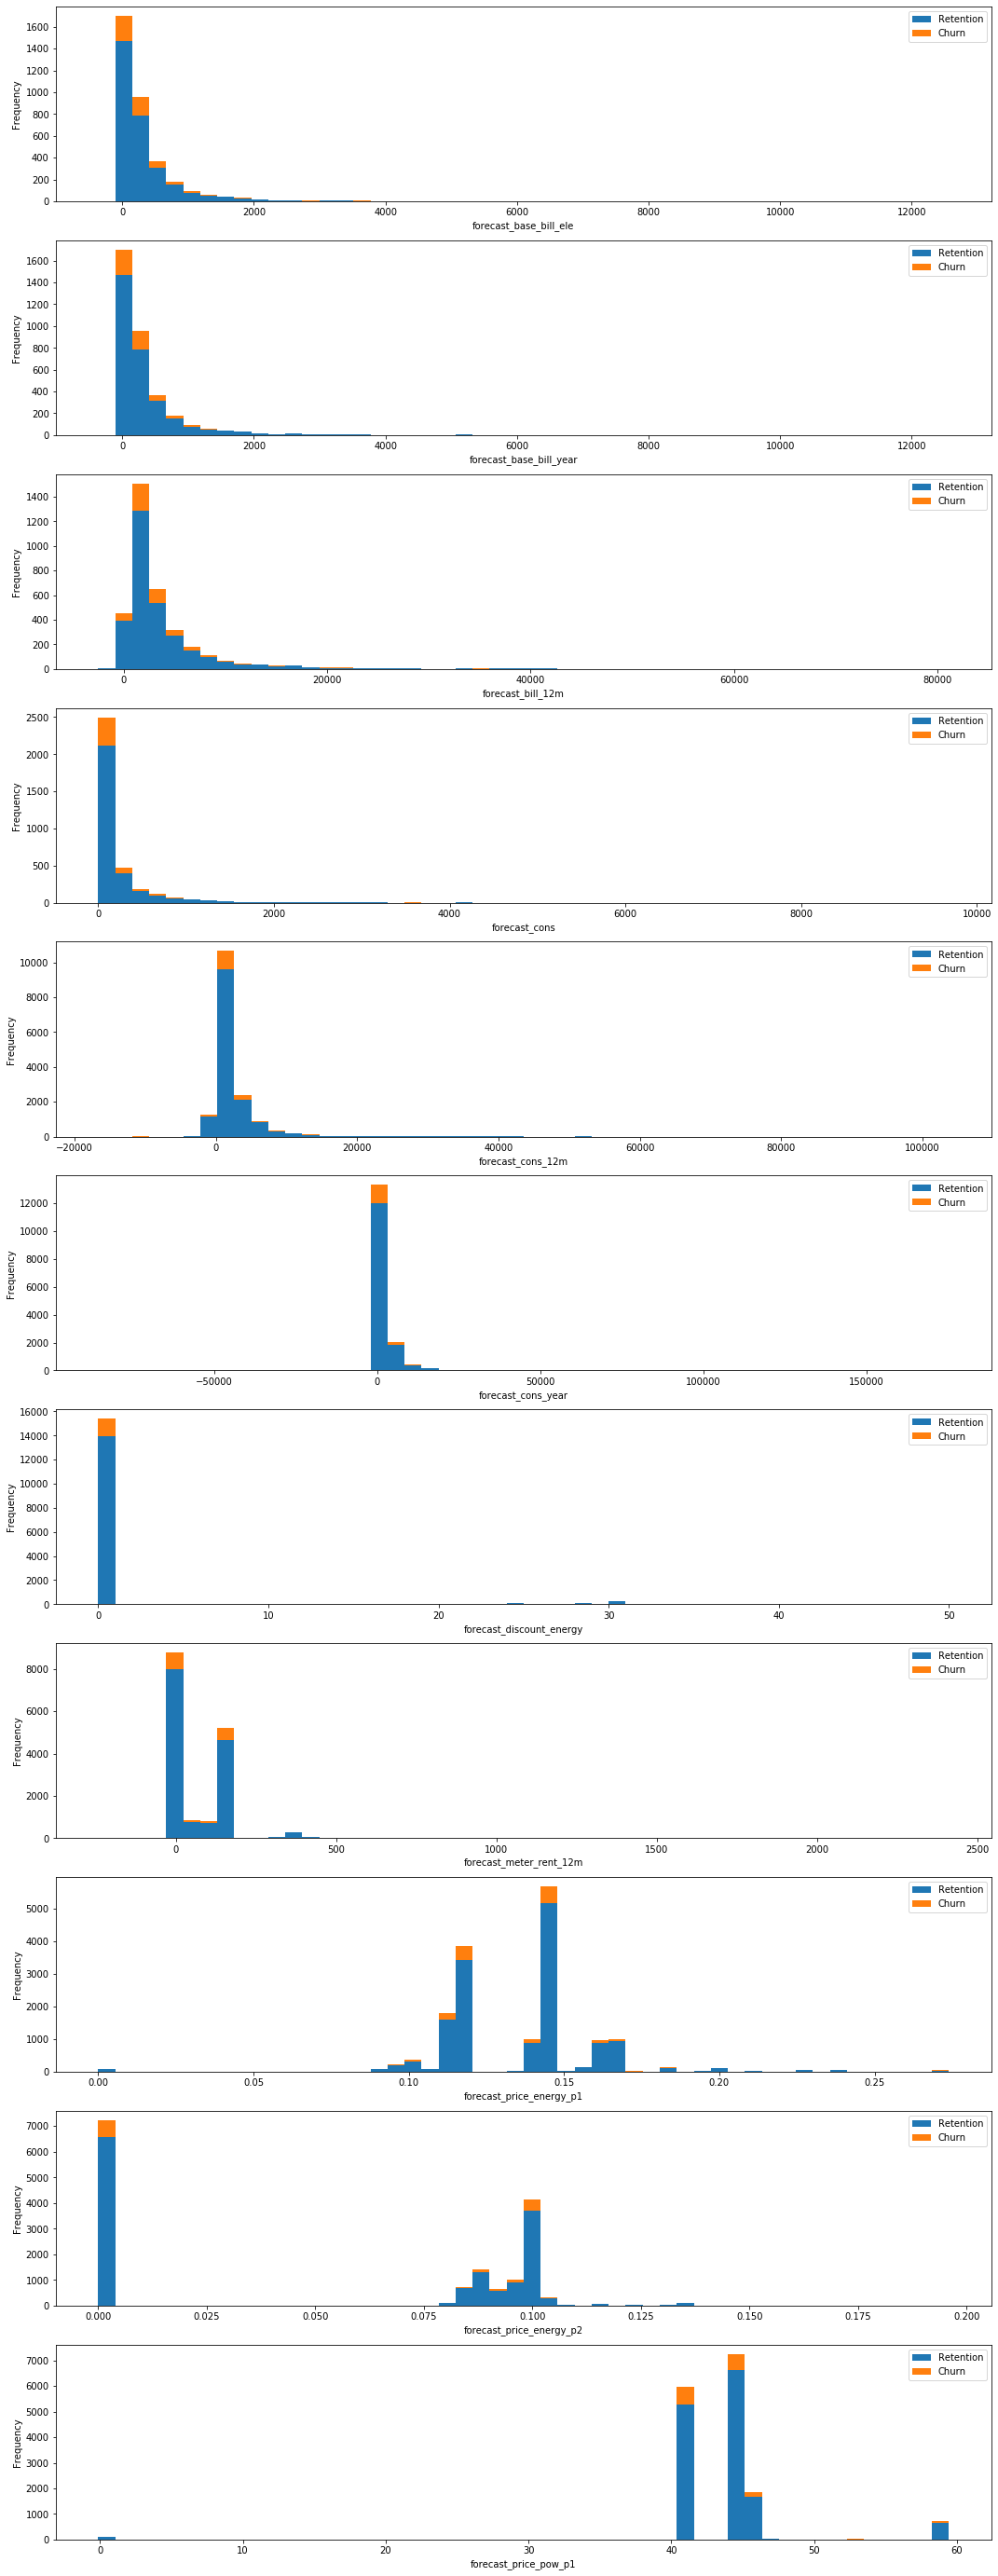

In [165]:
fig, axs=plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(df, "forecast_base_bill_ele", axs[0])
plot_distribution(df, "forecast_base_bill_year", axs[1])
plot_distribution(df, "forecast_bill_12m", axs[2])
plot_distribution(df, "forecast_cons", axs[3])
plot_distribution(df, "forecast_cons_12m", axs[4])
plot_distribution(df, "forecast_cons_year", axs[5])
plot_distribution(df, "forecast_discount_energy", axs[6])
plot_distribution(df, "forecast_meter_rent_12m", axs[7])
plot_distribution(df, "forecast_price_energy_p1", axs[8])
plot_distribution(df, "forecast_price_energy_p2", axs[9])
plot_distribution(df, "forecast_price_pow_p1", axs[10])

Similarly to the consumption plots, we can observe that a lot of the variables are highly skewed to the right, creating a very long tail on the higher values.

### Contract type (electricity, gas)

In [166]:
contract_type=df[["id", "has_gas", "churn"]]

In [167]:
contract=contract_type.groupby([contract_type["churn"],
                                contract_type["has_gas"]])["id"].count().unstack(level=0)

In [168]:
contract_percentage= (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

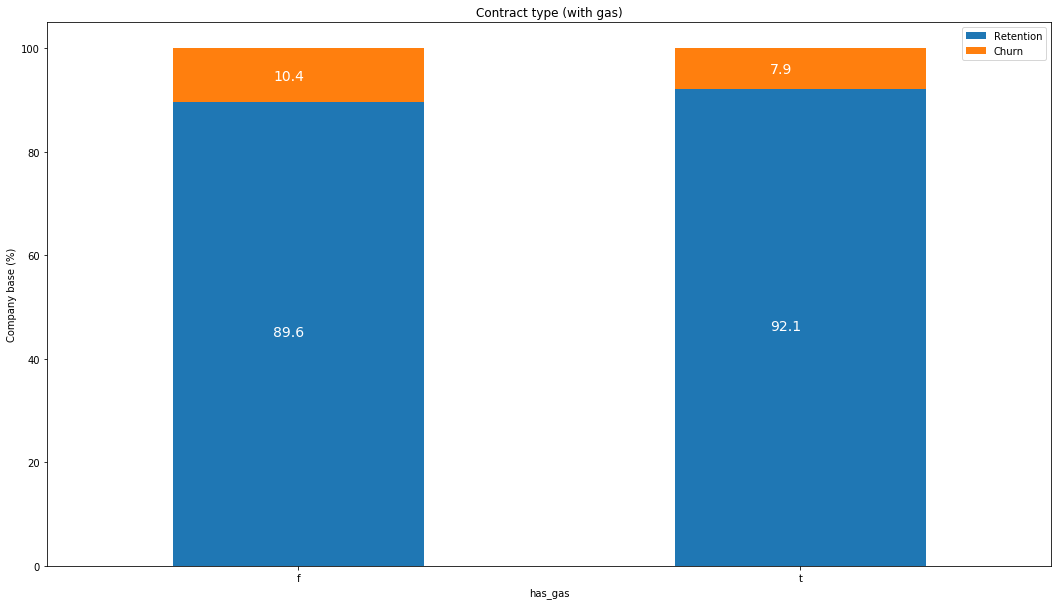

In [169]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

### Margins

In [170]:
margin=df[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

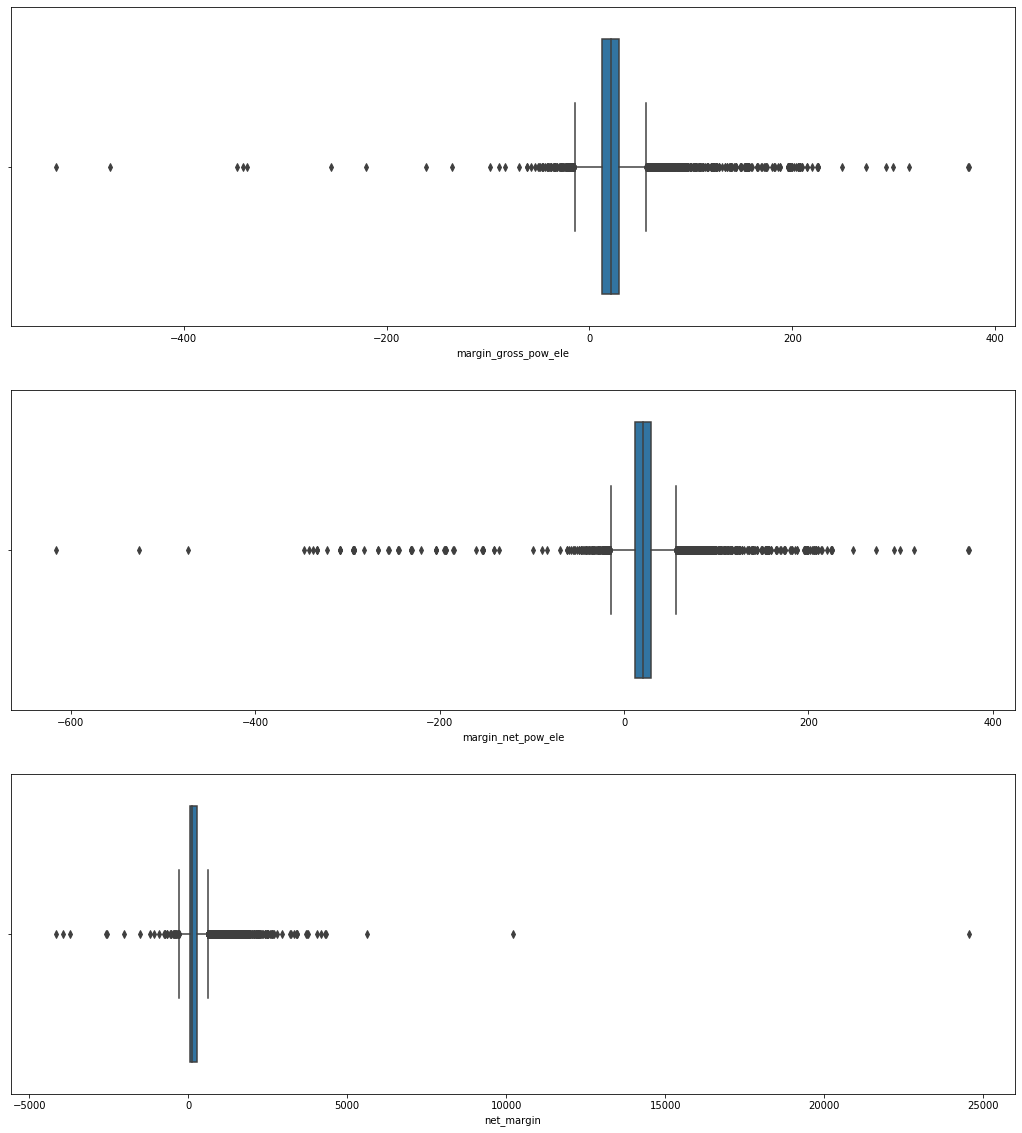

In [172]:
fig, axs=plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

can observe a few outliers in here as well.

### Subscribed power

In [173]:
power=df[["id","pow_max", "churn"]].fillna(0)

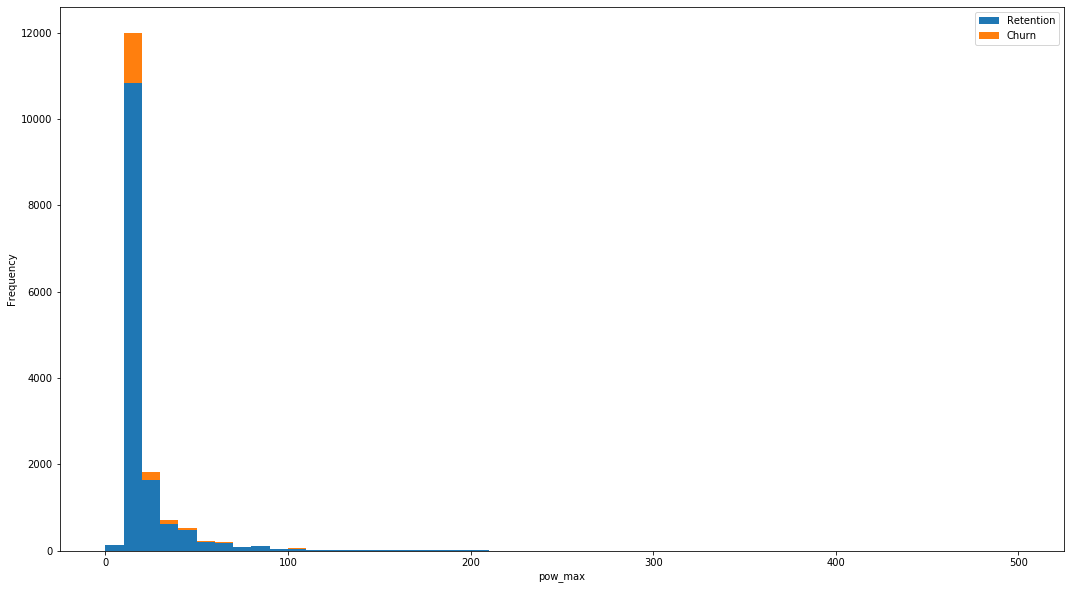

In [174]:
fig, axs=plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

### Others

In [175]:
others=df[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

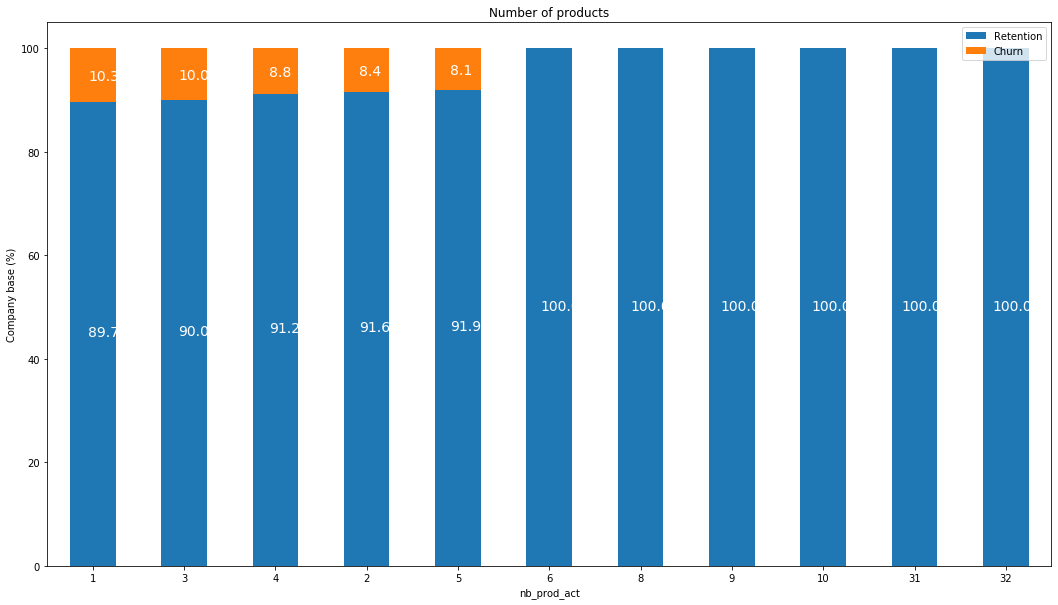

In [176]:
products=others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage= (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

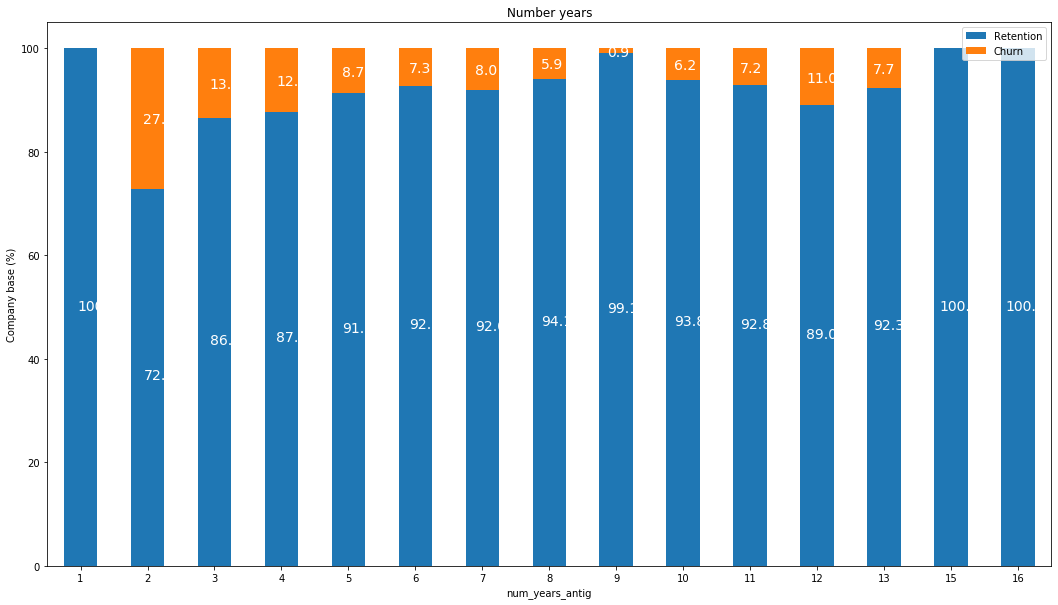

In [177]:
years_antig=others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage= (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

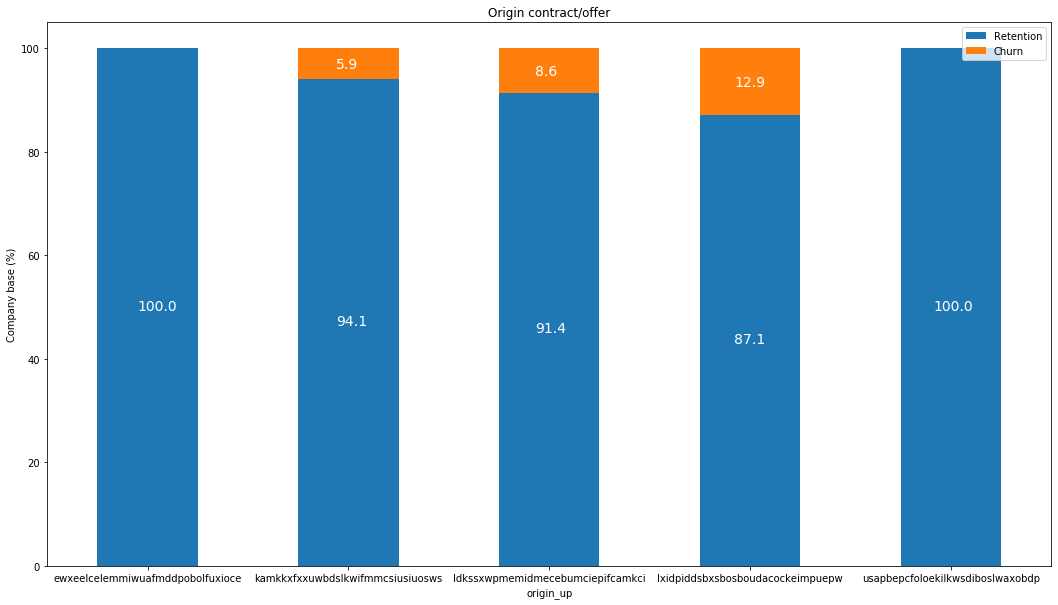

In [178]:
origin=others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage= (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## Pickling

Pickling is useful for applications where we need some degree of persistency in our data. Our program's state data can be saved to disk, so we cancontinue working on it later on.

Make directory processed_data if it does not exist already

In [181]:
import os
if not os.path.exists(os.path.join("..", "processed_data")):
    os.makedirs(os.path.join("..", "processed_data"))

In [182]:
PICKLE_TRAIN_DIR=os.path.join("..", "processed_data", "train_data.pkl")
PICKLE_HISTORY_DIR=os.path.join("..", "processed_data", "history_data.pkl")

In [185]:
pd.to_pickle(df, PICKLE_TRAIN_DIR)
pd.to_pickle(hist_data, PICKLE_HISTORY_DIR)

In [96]:
# mean values for numeric columns and the most frequent value for non-numeric columns
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [97]:
data_2 = DataFrameImputer().fit_transform(data_1)

In [66]:
hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [67]:
# count number of NAN for each column
hist_data.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

### Outliers


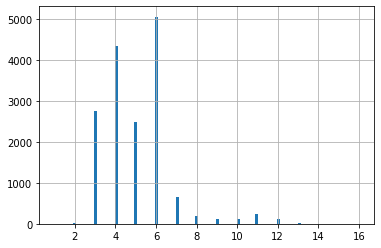

In [57]:
# histogram of life_sq.
data_1['num_years_antig'].hist(bins=100)

## Exploratory Data Analysis

In [87]:
data_1.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


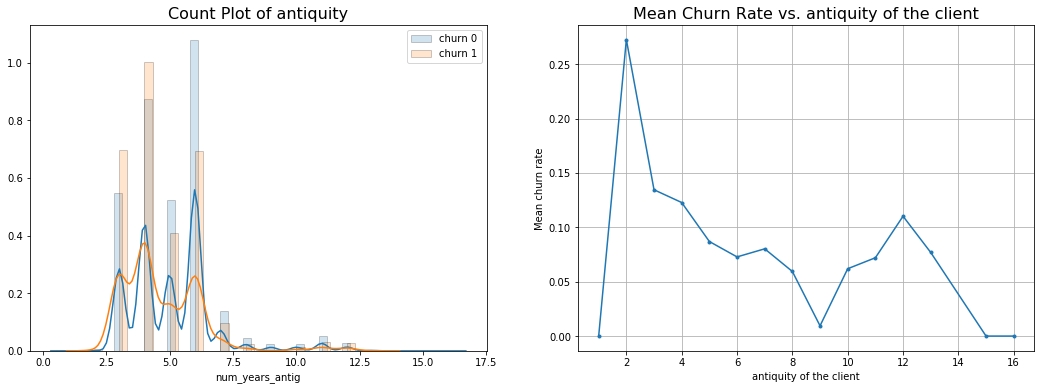

In [98]:
# Visualization of different sources
grouped = data_2[['num_years_antig', 'churn']].groupby('num_years_antig').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data_1[data_2['churn'] == 0]['num_years_antig'], label='churn 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data_1[data_2['churn'] == 1]['num_years_antig'], label='churn 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of antiquity', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['num_years_antig'], grouped['churn'], '.-')
ax[1].set_title('Mean Churn Rate vs. antiquity of the client', fontsize=16)
ax[1].set_xlabel('antiquity of the client')
ax[1].set_ylabel('Mean churn rate')
ax[1].grid(True)
plt.show()

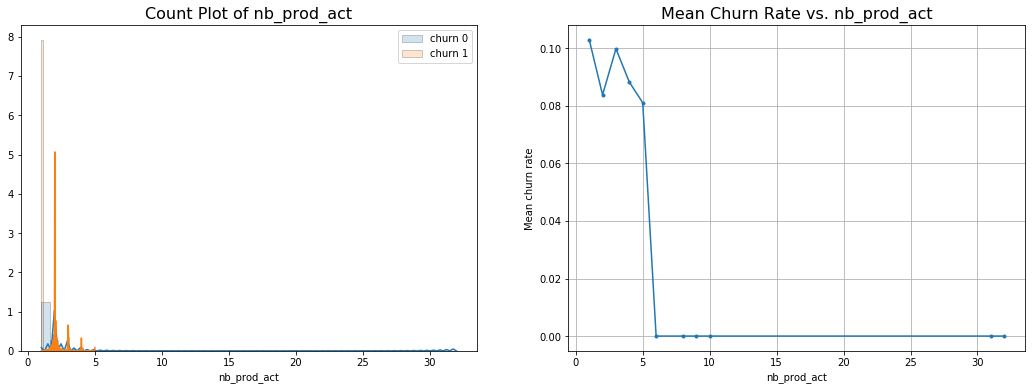

In [99]:
# Visualization of different sources
grouped = data_2[['nb_prod_act', 'churn']].groupby('nb_prod_act').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data_2[data_1['churn'] == 0]['nb_prod_act'], label='churn 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data_2[data_1['churn'] == 1]['nb_prod_act'], label='churn 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of nb_prod_act', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['nb_prod_act'], grouped['churn'], '.-')
ax[1].set_title('Mean Churn Rate vs. nb_prod_act', fontsize=16)
ax[1].set_xlabel('nb_prod_act')
ax[1].set_ylabel('Mean churn rate')
ax[1].grid(True)
plt.show()

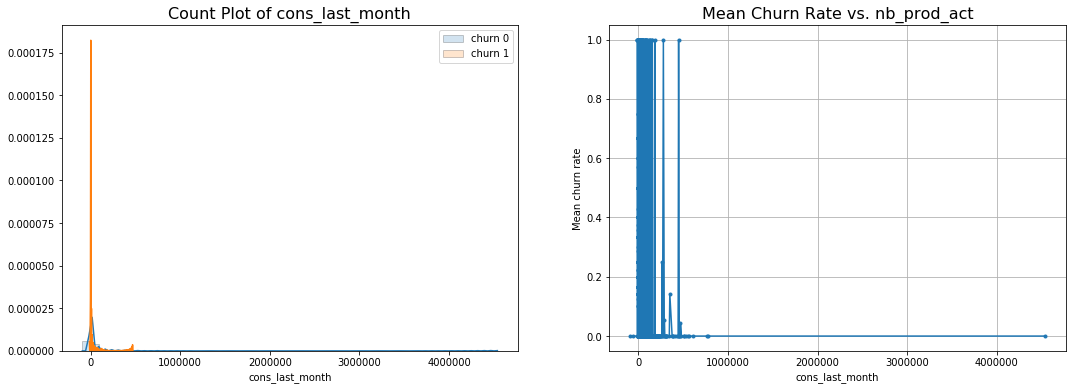

In [102]:
# Visualization of different sources
grouped = data_2[['cons_last_month', 'churn']].groupby('cons_last_month').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data_2[data_1['churn'] == 0]['cons_last_month'], label='churn 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data_2[data_1['churn'] == 1]['cons_last_month'], label='churn 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of cons_last_month', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['cons_last_month'], grouped['churn'], '.-')
ax[1].set_title('Mean Churn Rate vs. nb_prod_act', fontsize=16)
ax[1].set_xlabel('cons_last_month')
ax[1].set_ylabel('Mean churn rate')
ax[1].grid(True)
plt.show()